# Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

# Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino,identificacoes_treino),(imagens_teste,identificacoes_teste)) = dataset.load_data()

# Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_treino)
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

# Exibição dos dados

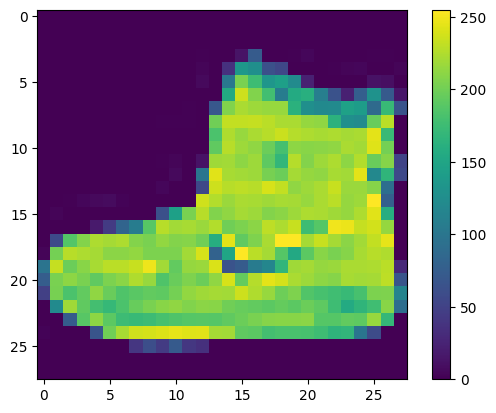

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

# Normalizando as imagens

In [5]:
imagens_treino = imagens_treino / float(255)

# Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(total_de_classificacoes, activation=tensorflow.nn.softmax)
])

modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5742 - accuracy: 0.7946 - val_loss: 0.4029 - val_accuracy: 0.8554
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4354 - accuracy: 0.8425 - val_loss: 0.3703 - val_accuracy: 0.8660
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4014 - accuracy: 0.8546 - val_loss: 0.3766 - val_accuracy: 0.8619
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3757 - accuracy: 0.8611 - val_loss: 0.3706 - val_accuracy: 0.8665
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3623 - accuracy: 0.8668 - val_loss: 0.3465 - val_accuracy: 0.8755


# Salvando e carregando o modelo

In [7]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

# Visualizando as acurácias de treino e validação por época

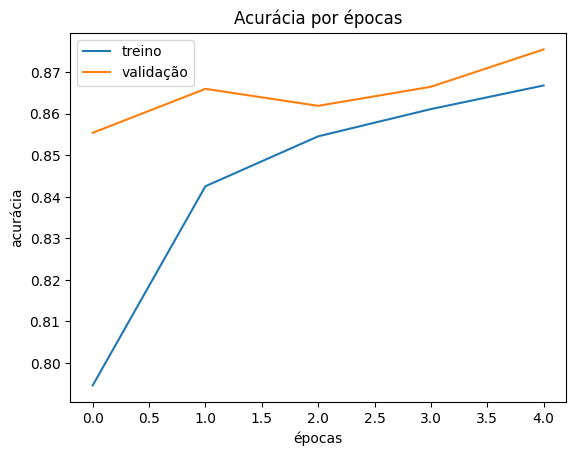

In [8]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

# Visualizando as perdas de treino e validação por época

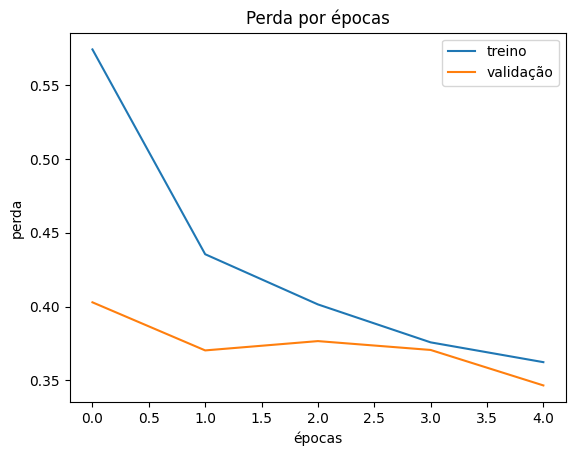

In [9]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

# Testando o modelo e o modelo salvo

In [10]:
testes = modelo.predict(imagens_teste)
print('resultado teste: ',np.argmax(testes[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste: ',np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste: ', identificacoes_teste[1])

313/313 [==============================] - 0s 1ms/step
resultado teste:  2
número da imagem de teste:  2
313/313 [==============================] - 0s 959us/step
resultado teste:  2
número da imagem de teste:  2


# Avaliando o modelo

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 [==============================] - 0s 1ms/step - loss: 56.9754 - accuracy: 0.8557
Perda do teste:  56.975399017333984
Acuracia do teste:  0.8557000160217285
